<a href="https://colab.research.google.com/github/RicardoHG7/Valores-at-picos/blob/main/Actividad3_2021_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("2021.csv")
df

,Unnamed: 0,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,490.00,78.40,0.0,0.0,568.40,568.40,I,Vigente,0
1,1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,345.00,55.20,0.0,0.0,400.20,400.20,I,Vigente,0
2,2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00,I,Vigente,0
3,3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,I,Vigente,0
4,4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,I,Vigente,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,3030,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,Pago,Sin registro,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,Sin registro
3031,3031,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,Sin registro
3032,3032,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04,I,Vigente,Sin registro
3033,3033,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,Sin registro


In [3]:
#Reemplazamos valores nulos del dataframe con "bfill"
df1 =df.fillna(method="bfill") 

In [4]:
#Corroboramos valores nulos del dataframe
valores_nulos=df1.isnull().sum()
valores_nulos

Unnamed: 0     0
FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
MP             0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
POLIZA         0
dtype: int64

In [5]:
#Seleccionar las coumnas en cuantitativas
df1s= df.iloc[ : , 9:15] 
df1s


,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX
0,1.0,490.00,78.40,0.0,0.0,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30
...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00


In [6]:
#Variables cualitativas 
df2=df.iloc[ : , [1,2,3,4,5,6,7,8,16,17,18]]
df2

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0
...,...,...,...,...,...,...,...,...,...,...,...
3030,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,Pago,Sin registro,P,Vigente,Sin registro
3031,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,PUE,I,Vigente,Sin registro
3032,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,Sin registro
3033,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,Sin registro


In [7]:
df1s = df1s.astype(float)

<Figure size 1500x800 with 0 Axes>

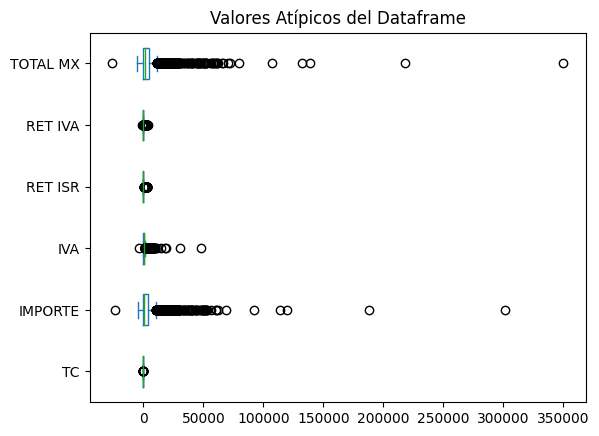

In [8]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df1s.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [9]:
y=df1s
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC              6.286851
IMPORTE     36154.569820
IVA          5464.876801
RET ISR       900.150092
RET IVA      1200.884906
TOTAL MX    40680.462408
dtype: float64
Limite inferior permitido TC             -3.981398
IMPORTE    -27625.812771
IVA         -4276.811367
RET ISR      -833.428945
RET IVA     -1053.848939
TOTAL MX   -31176.694132
dtype: float64


In [10]:
#Encontramos Ouliers del Dataframe
outliers= df1s[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3030,NaN,NaN,NaN,NaN,NaN,NaN
3031,NaN,NaN,NaN,NaN,NaN,NaN
3032,NaN,NaN,NaN,NaN,NaN,NaN
3033,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
DF1= df1s[(y<=Limite_Superior)&(y>=Limite_Inferior)]
DF1

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX
0,1.0,490.00,78.40,0.0,0.0,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30
...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00


In [12]:
valores_nulos=DF1.isnull().sum()
valores_nulos

TC          24
IMPORTE     43
IVA         38
RET ISR     32
RET IVA     81
TOTAL MX    40
dtype: int64

In [13]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=DF1.copy()
data_clean=data_clean.fillna(round(DF1.mean(),1))
data_clean

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX
0,1.0,490.00,78.40,0.0,0.0,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30
...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00


In [14]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data_clean.isnull().sum()
valores_nulos

TC          0
IMPORTE     0
IVA         0
RET ISR     0
RET IVA     0
TOTAL MX    0
dtype: int64

In [15]:
Datos_limpios2020 = pd.concat([df2,DF1], axis=1)
Datos_limpios2020

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,490.00,78.40,0.0,0.0,568.40
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,345.00,55.20,0.0,0.0,400.20
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0,1.0,3447.41,551.59,0.0,0.0,3999.00
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.38,888.22,0.0,0.0,6439.60
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.98,888.32,0.0,0.0,6440.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,Pago,Sin registro,P,Vigente,Sin registro,1.0,0.00,0.00,0.0,0.0,0.00
3031,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,PUE,I,Vigente,Sin registro,1.0,0.00,0.00,0.0,0.0,0.00
3032,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,Sin registro,1.0,22826.46,705.58,0.0,0.0,23532.04
3033,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,Sin registro,1.0,0.00,0.00,0.0,0.0,0.00


In [16]:
Datos_limpios2020.to_csv("2021porDataFrame.csv")
from google.colab import files   
files.download("2021porDataFrame.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=DF1

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido TC              1.000
IMPORTE      9642.525
IVA          1290.750
RET ISR         0.000
RET IVA         0.000
TOTAL MX    10985.200
dtype: float64
Limite inferior permitido TC             1.000
IMPORTE    -5785.515
IVA         -774.450
RET ISR        0.000
RET IVA        0.000
TOTAL MX   -6591.120
dtype: float64


In [18]:
#Encontramos Outliers del Dataframe
outliers_iqr= DF1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3030,NaN,NaN,NaN,NaN,NaN,NaN
3031,NaN,NaN,NaN,NaN,NaN,NaN
3032,NaN,22826.46,NaN,NaN,NaN,23532.04
3033,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Obtenemos datos limpios del Dataframe
data3_iqr= DF1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX
0,1.0,490.00,78.40,0.0,0.0,568.4
1,1.0,345.00,55.20,0.0,0.0,400.2
2,1.0,3447.41,551.59,0.0,0.0,3999.0
3,1.0,5551.38,888.22,0.0,0.0,6439.6
4,1.0,5551.98,888.32,0.0,0.0,6440.3
...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.0
3031,1.0,0.00,0.00,0.0,0.0,0.0
3032,1.0,NaN,705.58,0.0,0.0,NaN
3033,1.0,0.00,0.00,0.0,0.0,0.0


In [20]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

TC           24
IMPORTE     367
IVA         363
RET ISR      56
RET IVA     212
TOTAL MX    358
dtype: int64

In [21]:
DF2=DF1.copy()
DF2=DF2.fillna(round(DF1.mean(),1))
DF2

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX
0,1.0,490.00,78.40,0.0,0.0,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30
...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00


In [22]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=DF2.isnull().sum()
valores_nulos

TC          0
IMPORTE     0
IVA         0
RET ISR     0
RET IVA     0
TOTAL MX    0
dtype: int64

In [23]:
Datos_limpios2020_iqr = pd.concat([df2,DF2], axis=1)
Datos_limpios2020_iqr

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,490.00,78.40,0.0,0.0,568.40
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,345.00,55.20,0.0,0.0,400.20
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0,1.0,3447.41,551.59,0.0,0.0,3999.00
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.38,888.22,0.0,0.0,6439.60
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.98,888.32,0.0,0.0,6440.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,Pago,Sin registro,P,Vigente,Sin registro,1.0,0.00,0.00,0.0,0.0,0.00
3031,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,PUE,I,Vigente,Sin registro,1.0,0.00,0.00,0.0,0.0,0.00
3032,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,Sin registro,1.0,22826.46,705.58,0.0,0.0,23532.04
3033,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,Sin registro,1.0,0.00,0.00,0.0,0.0,0.00


In [24]:
Datos_limpios2020_iqr.to_csv("2021porDataFrame_iqr.csv")
from google.colab import files   
files.download("2021porDataFrame_iqr.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>